# Problem 1
Recreate your testNet neural network in Tensorflow and compare the performance of the two networks.
Give possible reasons for their different performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-02-07 14:37:21.955066: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 14:37:21.982627: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 14:37:21.982653: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 14:37:21.983267: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-07 14:37:21.987267: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 14:37:21.987588: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
data_train = np.load('/mnt/share/nnds/mnist/mnistDataTrain.npy')
labels_train = np.load('/mnt/share/nnds/mnist/mnistLabelsTrain.npy')

data_test = np.load('/mnt/share/nnds/mnist/mnistDataTest.npy')
labels_test = np.load('/mnt/share/nnds/mnist/mnistLabelsTest.npy')

In [3]:
testNet = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 28 x 28 = 784 input nodes
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

2024-02-07 14:37:26.728562: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-07 14:37:26.729066: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
lr = 0.6

testNet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# training the model
history = testNet.fit(data_train, labels_train, epochs=10, validation_data=(data_test, labels_test))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3211 - accuracy: 0.9040 - val_loss: 0.1890 - val_accuracy: 0.9431
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1534 - accuracy: 0.9550 - val_loss: 0.1230 - val_accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1077 - accuracy: 0.9685 - val_loss: 0.1036 - val_accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0836 - accuracy: 0.9751 - val_loss: 0.0946 - val_accuracy: 0.9720
Epoch 5/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.0684 - accuracy: 0.9793 - val_loss: 0.0849 - val_accuracy: 0.9733
Epoch 6/10
1875/1875 [==============================] - 2s 993us/step - loss: 0.0566 - accuracy: 0.9837 - val_loss: 0.0762 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 2s 965us/step - loss: 0.0488 - accuracy: 0.9859 - val_loss: 0.0741 - val_acc

The tensorflow model with similar architecture was significantly more accurate on test data than the custom built model from lab 8 after training with the same training data.

tensorflow model accuracy: 97.69%
custom built model accuracy: 9.8%

Possible reasons for these discrepancies include:
- the fixed batch size while training the custom built model.
- the lack of an optimizer in the custom built model.
- the limited range of learning rates and hidden nodes for fixed batch size in the custom built model.
- the lack of image augmentation in the custom built model.

# Problem 2
Tensorflow’s fit method returns a history object which in turn contains an attribut history. Extract it
from the object. Use it to plot the validation accuracy, training accuracy and loss as a function of the epoch.
Set up a network with a single fully connected layer with 256 nodes (ReLU activated) and train it on MNIST
Fashion.

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 28 x 28 = 784 input nodes
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(data_train, labels_train, epochs=10, validation_data=(data_test, labels_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2245 - accuracy: 0.9347 - val_loss: 0.1075 - val_accuracy: 0.9684
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0920 - accuracy: 0.9730 - val_loss: 0.0815 - val_accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0612 - accuracy: 0.9813 - val_loss: 0.0731 - val_accuracy: 0.9781
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0654 - val_accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0611 - val_accuracy: 0.9811
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0652 - val_accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.0762 - val_accuracy:

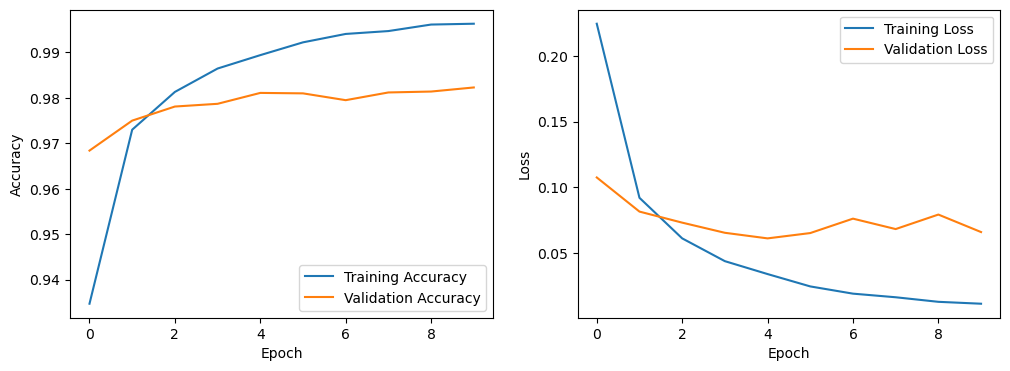

In [9]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Problem 3
Tensorflow provides the tf.math.confusion_matrix method to create a simple confusion matrix. It returns
a tf.tensor which can be converted into a regular Numpy array using np.array. Write a function
confusion_matrix that takes a Tensorflow model and a test dataset, evaluates the test dataset, calculates
the confusion matrix and turns it into something more readable, e.g. by providing labels, additional
explanations, or even a nice graph via plt.img.

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [11]:
def plot_confusion_matrix(model, test_data, test_labels, class_names=None, figsize=(8, 6)):
    pred = model.predict(test_data)
    pred_classes = np.argmax(pred, axis=1)
    cm = confusion_matrix(test_labels, pred_classes)
    
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.show()

313/313 [==============================] - 0s 504us/step


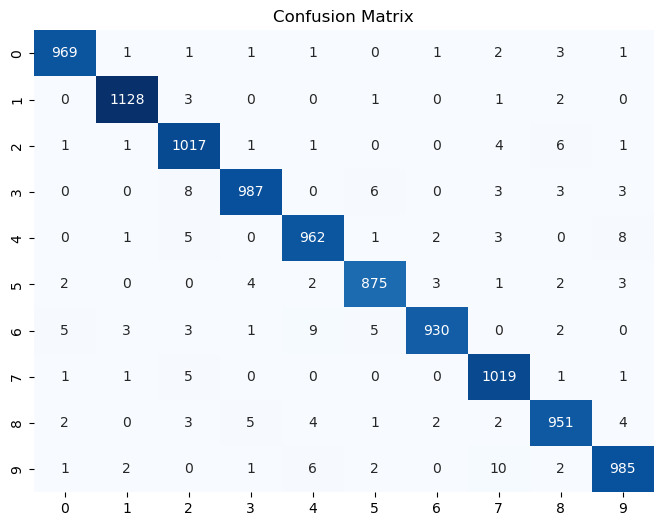

In [12]:
plot_confusion_matrix(model, data_test, labels_test)

# Problem 4
So far, we have been working with grayscale images.

a) Color images are harder to process because they contain more information than grayscale images. Grayscale images have a single channel representing intensity, whereas color images typically have three channels (Red, Green, and Blue). This additional information increases the complexity of the data and requires modifications to the neural network architecture. Neural networks designed for grayscale images may not be directly applicable to color images due to differences in input dimensions and the need to handle multiple channels.

b) Loading data from the CIFAR-10 dataset...

In [13]:
data_cifar_train = np.load('/mnt/share/nnds/cifar10bw/dataTrain.npy')
labels_cifar_train = np.load('/mnt/share/nnds/cifar10bw/labelsTrain.npy')
data_cifar_test = np.load('/mnt/share/nnds/cifar10bw/dataTest.npy')
labels_cifar_test = np.load('/mnt/share/nnds/cifar10bw/labelsTest.npy')

# Normalizing pixel values to the range [0, 1]
data_cifar_train = data_cifar_train.astype('float32') / 255.0
data_cifar_test = data_cifar_test.astype('float32') / 255.0

data_cifar_train = data_cifar_train.reshape((-1, 32, 32))
data_cifar_test = data_cifar_test.reshape((-1, 32, 32))

print(data_cifar_train.shape)

(50000, 32, 32)


c) Creating a network with a single hidden layer with 256 nodes (ReLU activation) and a softmaxed output.

In [14]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import SGD
from keras import backend as K

K.clear_session()

In [15]:
cifar_model = Sequential()
cifar_model.add(Flatten(input_shape=(32, 32)))
cifar_model.add(Dense(256, activation='relu'))
cifar_model.add(Dense(10, activation='softmax'))

and training the network for (up to) 50 epochs and discuss the performance of the network...

In [16]:
from keras.utils import to_categorical

labels_cifar_train = to_categorical(labels_cifar_train, num_classes=10)
labels_cifar_test = to_categorical(labels_cifar_test, num_classes=10)

cifar_model.compile(optimizer=SGD(lr=0.6), loss='categorical_crossentropy', metrics=['accuracy'])
history = cifar_model.fit(data_cifar_train, labels_cifar_train,
                    epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3023 - accuracy: 0.1040 - val_loss: 2.3021 - val_accuracy: 0.1016
Epoch 2/50
1250/1250 [==============================] - 2s 1ms/step - loss: 2.3022 - accuracy: 0.1035 - val_loss: 2.3021 - val_accuracy: 0.1016
Epoch 3/50
1250/1250 [==============================] - 2s 1ms/step - loss: 2.3021 - accuracy: 0.1046 - val_loss: 2.3021 - val_accuracy: 0.0952
Epoch 4/50
1250/1250 [==============================] - 2s 1ms/step - loss: 2.3020 - accuracy: 0.1080 - val_loss: 2.3020 - val_accuracy: 0.0952
Epoch 5/50
1250/1250 [==============================] - 2s 1ms/step - loss: 2.3020 - accuracy: 0.1044 - val_loss: 2.3018 - val_accuracy: 0.1311
Epoch 6/50
1250/1250 [==============================] - 2s 1ms/step - loss: 2.3019 - accuracy: 0.1093 - val_loss: 2.3018 - val_accuracy: 0.1354
Epoch 7/50
1250/1250 [==============================] - 2s 1ms/step - loss: 2.3018 - accuracy: 0.1090 - val_loss: 2.3017 - val_accuracy:

The network's performance on the validation dataset could be improved. This may be done by; 

- changing hyperparameters and parameters like the number of nodes in its hidden layer
- using a more optimal learning rate.
- training for less of more epochs to avoid overfitting and underfitting respectively.
- and of course by adding more hidden layers.

d) Calculating the fraction of correctly classified images as a function of the image class...

In [20]:
cifar_test_loss, cifar_test_acc = cifar_model.evaluate(data_cifar_test, labels_cifar_test, verbose=2)

print(f'Test accuracy: {cifar_test_acc}')

313/313 - 0s - loss: 2.2953 - accuracy: 0.1378 - 182ms/epoch - 581us/step
Test accuracy: 0.13779999315738678


e) Creating a network with two hidden layers with 256 nodes each (ReLU activation) and a softmaxed
output.

In [21]:
cifar_model2 = Sequential()
cifar_model2.add(Flatten(input_shape=(32, 32)))
cifar_model2.add(Dense(256, activation='relu'))
cifar_model2.add(Dense(256, activation='relu'))
cifar_model2.add(Dense(10, activation='softmax'))

and training the network for (up to) 50 epochs...

In [22]:
cifar_model2.compile(optimizer=SGD(lr=0.6), loss='categorical_crossentropy', metrics=['accuracy'])
history2 = cifar_model2.fit(data_cifar_train, labels_cifar_train,
                    epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3022 - accuracy: 0.1072 - val_loss: 2.3020 - val_accuracy: 0.0952
Epoch 2/50
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3019 - accuracy: 0.1069 - val_loss: 2.3020 - val_accuracy: 0.0952
Epoch 3/50
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3019 - accuracy: 0.1065 - val_loss: 2.3019 - val_accuracy: 0.0973
Epoch 4/50
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3018 - accuracy: 0.1072 - val_loss: 2.3017 - val_accuracy: 0.0952
Epoch 5/50
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3017 - accuracy: 0.1091 - val_loss: 2.3016 - val_accuracy: 0.1003
Epoch 6/50
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3017 - accuracy: 0.1069 - val_loss: 2.3014 - val_accuracy: 0.1456
Epoch 7/50
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3015 - accuracy: 0.1082 - val_loss: 2.3014 - val_accuracy:

In [23]:
cifar_test_loss2, cifar_test_acc2 = cifar_model2.evaluate(data_cifar_test, labels_cifar_test, verbose=2)

print(f'Test accuracy: {cifar_test_acc2}')

313/313 - 0s - loss: 2.2497 - accuracy: 0.1913 - 293ms/epoch - 937us/step
Test accuracy: 0.19130000472068787


We can see that with the same learning rate the performance of the model with two hidden layers was significantly greater!